In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
mnist['frame']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [6]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [7]:
X = mnist.data
y = (mnist['target']).astype(np.int_)

X = X/255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
def one_hot(y):
  enc = np.zeros((y.shape[0], 10))
  enc[np.arange(y.shape[0]), y] = 1
  return enc.T

y_train = one_hot(y_train)
y_test = one_hot(y_test)

In [9]:
X_train = X_train.T
X_test = X_test.T

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((784, 56000), (784, 14000), (10, 56000), (10, 14000))

In [11]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.W1 = np.random.randn(hidden_size1, input_size) * np.sqrt(2 / input_size)
        self.B1 = np.zeros((hidden_size1, 1))
        self.W2 = np.random.randn(hidden_size2, hidden_size1) * np.sqrt(2 / hidden_size1)
        self.B2 = np.zeros((hidden_size2, 1))
        self.W3 = np.random.randn(output_size, hidden_size2) * np.sqrt(2 / hidden_size2)
        self.B3 = np.zeros((output_size, 1))

    def ReLU(self, z):
        return np.maximum(0, z)

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return e_z / np.sum(e_z, axis=0, keepdims=True)

    def dReLU(self, z):
        return z > 0

    def forward(self, X):
        self.Z1 = np.dot(self.W1, X) + self.B1       # (hidden_size1, m)
        self.A1 = self.ReLU(self.Z1)                # (hidden_size1, m)
        self.Z2 = np.dot(self.W2, self.A1) + self.B2 # (hidden_size2, m)
        self.A2 = self.ReLU(self.Z2)                # (hidden_size2, m)
        self.Z3 = np.dot(self.W3, self.A2) + self.B3 # (output_size, m)
        self.A3 = self.softmax(self.Z3)             # (output_size, m)
        return self.A3

    def backward(self, X, y, alpha):
        m = X.shape[1]

        # Compute gradients
        dZ3 = self.A3 - y                             # (output_size, m)
        dW3 = 1 / m * np.dot(dZ3, self.A2.T)          # (output_size, m) * (m, hidden_size2) = (output_size, hidden_size2)
        dB3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True) # (output_size, 1)

        dA2 = np.dot(self.W3.T, dZ3)                  # (hidden_size2, output_size) * (output_size, m) = (hidden_size2, m)
        dZ2 = dA2 * self.dReLU(self.Z2)               # (hidden_size2, m)
        dW2 = 1 / m * np.dot(dZ2, self.A1.T)         # (hidden_size2, m) * (m, hidden_size1) = (hidden_size2, hidden_size1)
        dB2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True) # (hidden_size2, 1)

        dA1 = np.dot(self.W2.T, dZ2)                  # (hidden_size1, hidden_size2) * (hidden_size2, m) = (hidden_size1, m)
        dZ1 = dA1 * self.dReLU(self.Z1)               # (hidden_size1, m)
        dW1 = 1 / m * np.dot(dZ1, X.T)                # (hidden_size1, m) * (m, input_size) = (hidden_size1, input_size)
        dB1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True) # (hidden_size1, 1)

        self.W3 -= alpha * dW3
        self.B3 -= alpha * dB3
        self.W2 -= alpha * dW2
        self.B2 -= alpha * dB2
        self.W1 -= alpha * dW1
        self.B1 -= alpha * dB1

    def train(self, X, y, epochs, alpha):
        for epoch in range(epochs):
            pred = self.forward(X)
            loss = -np.mean(np.sum(y * np.log(pred + 1e-8), axis=0))
            self.backward(X, y, alpha)

            if epoch % 10 == 0:
                print(f"On step {epoch}: Training loss: {loss:.4f}")

    def predict(self, X):
        pred = self.forward(X)
        return np.argmax(pred, axis=0)

    def accuracy(self, X, y):
        pred = self.predict(X)
        y_true = np.argmax(y, axis=0)
        accuracy = 100 * np.mean(pred == y_true)
        return accuracy


In [ ]:
model = MLP(784, 256, 128, 10)

In [27]:
model.train(X_train, y_train, epochs=101, alpha=0.1)

On step 0: Training loss: 0.3269
On step 10: Training loss: 0.3194
On step 20: Training loss: 0.3127
On step 30: Training loss: 0.3065
On step 40: Training loss: 0.3008
On step 50: Training loss: 0.2956
On step 60: Training loss: 0.2906
On step 70: Training loss: 0.2859
On step 80: Training loss: 0.2816
On step 90: Training loss: 0.2774
On step 100: Training loss: 0.2734


In [ ]:
y_pred = model.predict(X_train)
accuracy = model.accuracy(X_train, y_train)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.86%


In [ ]:
y_pred = model.predict(X_test)
accuracy = model.accuracy(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.05%


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X_test.shape

(14000, 784)

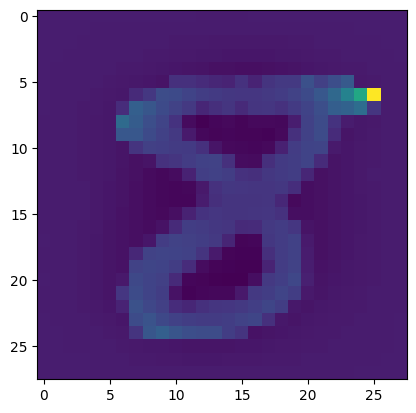

In [ ]:
plt.imshow(X_test[:1].reshape(28, 28), interpolation='nearest')

In [ ]:
y_test[:1], y_pred[:1]

(46730    8
 Name: class, dtype: int64,
 array([8]))